In [112]:
from pathlib import Path
import tarfile
import pandas as pd

def load_data():
    tarball_path = Path("./titanic.tgz")
    with tarfile.open(tarball_path) as tarball:
        tarball.extractall(path="./", filter = "data")
    return pd.read_csv(Path("./titanic/test.csv")), pd.read_csv(Path("./titanic/train.csv"))

test, train =  load_data()

In [113]:
titanic_train = train.copy()
titanic_test = test.copy()
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
correlation_matrix = titanic_train.corr(numeric_only = True)
correlation_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

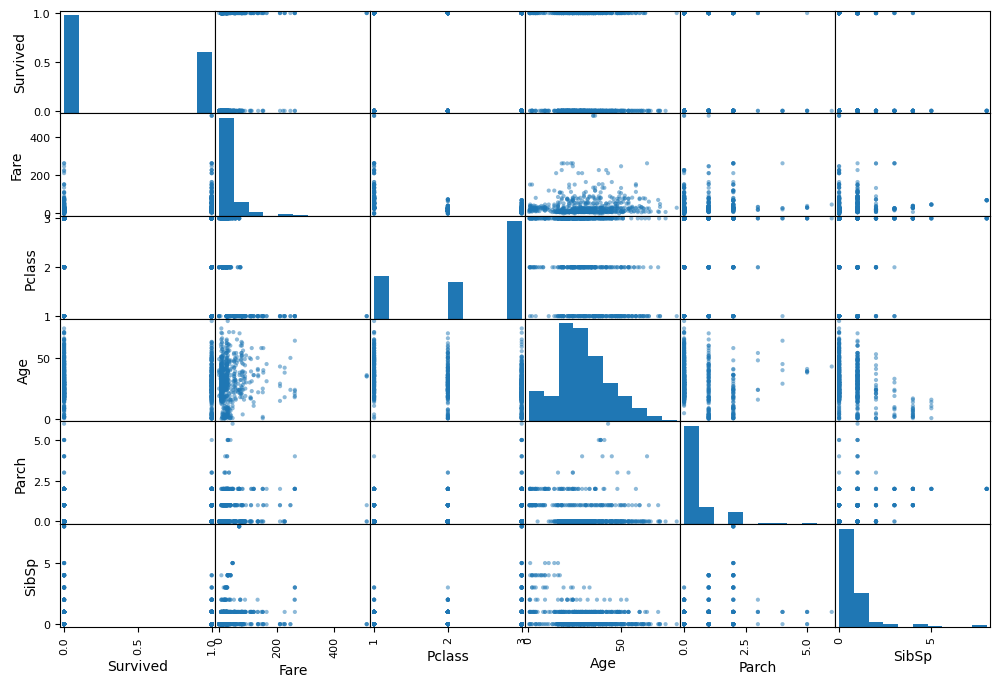

In [115]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
attributes = ["Survived", "Fare", "Pclass", "Age", "Parch", "SibSp"]
scatter_matrix(titanic_train[attributes], figsize = (12, 8))
plt.show()


In [116]:
titanic_train_data = titanic_train.drop("Survived", axis = 1)
titanic_train_target = titanic_train["Survived"].copy()

In [117]:
titanic_train_data = titanic_train_data.drop(["Name", "Ticket"], axis = 1)
titanic_train_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,female,38.0,1,0,71.2833,C85,C
2,3,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,female,35.0,1,0,53.1000,C123,S
4,5,3,male,35.0,0,0,8.0500,NaN,S


In [118]:
titanic_train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [119]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ordinalencoder = OrdinalEncoder()
titanic_train_data["Sex"] = ordinalencoder.fit_transform(titanic_train_data[["Sex"]])
onehot = OneHotEncoder(sparse_output=False, drop = 'first')
embarked_encoded = onehot.fit_transform(titanic_train_data[["Embarked"]])
feature_names = onehot.get_feature_names_out(["Embarked"])
embarked_df = pd.DataFrame(embarked_encoded, columns = feature_names, index = titanic_train_data.index)
titanic_train_data = titanic_train_data.drop("Embarked", axis = 1)
titanic_train_data = pd.concat([titanic_train_data, embarked_df], axis = 1)
titanic_train_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S,Embarked_nan
0,1,3,1.0,22.0,1,0,7.2500,NaN,0.0,1.0,0.0
1,2,1,0.0,38.0,1,0,71.2833,C85,0.0,0.0,0.0
2,3,3,0.0,26.0,0,0,7.9250,NaN,0.0,1.0,0.0
3,4,1,0.0,35.0,1,0,53.1000,C123,0.0,1.0,0.0
4,5,3,1.0,35.0,0,0,8.0500,NaN,0.0,1.0,0.0


In [120]:
titanic_train_data = titanic_train_data.drop(["Cabin", "PassengerId"], axis = 1)
titanic_train_data.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Embarked_nan
0,3,1.0,22.0,1,0,7.2500,0.0,1.0,0.0
1,1,0.0,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,0.0,26.0,0,0,7.9250,0.0,1.0,0.0
3,1,0.0,35.0,1,0,53.1000,0.0,1.0,0.0
4,3,1.0,35.0,0,0,8.0500,0.0,1.0,0.0


In [121]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy = "median")
age = titanic_train_data.select_dtypes(include = [np.number]) 
imputer.fit(age)
X = imputer.transform(age)

In [122]:
numeric_columns = titanic_train_data.columns
titanic_train_data = pd.DataFrame(X, columns = numeric_columns)
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        891 non-null    float64
 1   Sex           891 non-null    float64
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    float64
 4   Parch         891 non-null    float64
 5   Fare          891 non-null    float64
 6   Embarked_Q    891 non-null    float64
 7   Embarked_S    891 non-null    float64
 8   Embarked_nan  891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

knn = KNeighborsClassifier()
cv = cross_val_score(knn, titanic_train_data, titanic_train_target, cv = 3, n_jobs = -1)
cv


array([0.67676768, 0.72390572, 0.71717172])

In [124]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]}]

GS = GridSearchCV(knn, param_grid=param_grid, cv = 3)
GS.fit(titanic_train_data, titanic_train_target)
GS.best_estimator_

,n_neighbors,6
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [125]:
best_knn = KNeighborsClassifier(n_neighbors=6, weights = "distance")
cross_val_score(best_knn, titanic_train_data, titanic_train_target, cv = 3)

array([0.7037037 , 0.72053872, 0.7037037 ])